In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sqlalchemy import create_engine

import warnings

warnings.filterwarnings('ignore')

## Load the dataset from the Thinkful PostgreSQL database.

## Please follow the example above and call engine.dispose() when you no longer need to make db queries. You need to be in the habit of responsibly managing database connections, and the database only supports a limited number of connections.

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

house_df = pd.read_sql_query('select * from houseprices',con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()

## Investigate the data, and do any necessary data cleaning.

In [3]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1460 non-null   int64  
 1   mssubclass     1460 non-null   int64  
 2   mszoning       1460 non-null   object 
 3   lotfrontage    1201 non-null   float64
 4   lotarea        1460 non-null   int64  
 5   street         1460 non-null   object 
 6   alley          91 non-null     object 
 7   lotshape       1460 non-null   object 
 8   landcontour    1460 non-null   object 
 9   utilities      1460 non-null   object 
 10  lotconfig      1460 non-null   object 
 11  landslope      1460 non-null   object 
 12  neighborhood   1460 non-null   object 
 13  condition1     1460 non-null   object 
 14  condition2     1460 non-null   object 
 15  bldgtype       1460 non-null   object 
 16  housestyle     1460 non-null   object 
 17  overallqual    1460 non-null   int64  
 18  overallc

In [4]:
house_df.head()

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000


In [5]:
house_df.describe()

,id,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,...,wooddecksf,openporchsf,enclosedporch,threessnporch,screenporch,poolarea,miscval,mosold,yrsold,saleprice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
house_df['alley'].fillna('NotExist', inplace=True)

In [7]:
house_df['alley'].value_counts()

NotExist    1369
Grvl          50
Pave          41
Name: alley, dtype: int64

In [8]:
house_df = house_df.dropna(subset=['masvnrtype'
                                   ,'masvnrarea'
                                   ,'lotfrontage'
                                   ,'bsmtqual'
                                   ,'bsmtcond'    
                                   ,'bsmtexposure' 
                                   ,'bsmtfintype1'
                                    ,'bsmtfintype2'
                                    ,'electrical'  
                                    ,'garagetype' 
                                    ,'garageyrblt'
                                    ,'garagefinish'
                                    ,'garagequal'
                                    ,'garagecond'
                                    ])

In [9]:
house_df = house_df.drop('poolqc', axis=1)
house_df = house_df.drop('fence', axis=1)
house_df = house_df.drop('miscfeature', axis=1)
house_df = house_df.drop('fireplacequ', axis=1)

In [10]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1094 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1094 non-null   int64  
 1   mssubclass     1094 non-null   int64  
 2   mszoning       1094 non-null   object 
 3   lotfrontage    1094 non-null   float64
 4   lotarea        1094 non-null   int64  
 5   street         1094 non-null   object 
 6   alley          1094 non-null   object 
 7   lotshape       1094 non-null   object 
 8   landcontour    1094 non-null   object 
 9   utilities      1094 non-null   object 
 10  lotconfig      1094 non-null   object 
 11  landslope      1094 non-null   object 
 12  neighborhood   1094 non-null   object 
 13  condition1     1094 non-null   object 
 14  condition2     1094 non-null   object 
 15  bldgtype       1094 non-null   object 
 16  housestyle     1094 non-null   object 
 17  overallqual    1094 non-null   int64  
 18  overallc

In [11]:
house_df.head()

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,enclosedporch,threessnporch,screenporch,poolarea,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.0,8450,Pave,NotExist,Reg,Lvl,AllPub,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NotExist,Reg,Lvl,AllPub,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NotExist,IR1,Lvl,AllPub,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NotExist,IR1,Lvl,AllPub,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NotExist,IR1,Lvl,AllPub,...,0,0,0,0,0,12,2008,WD,Normal,250000


## Explore the data and find some variables that you think would be useful in predicting house prices.

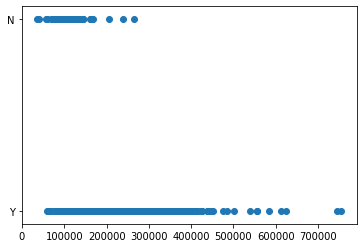

In [12]:
plt.scatter(house_df['saleprice'], house_df['centralair'])
plt.show()  

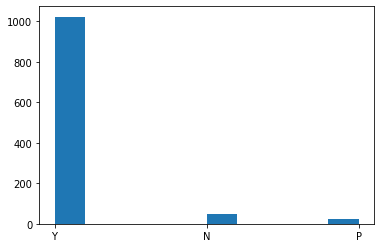

In [13]:
plt.hist(house_df['paveddrive'])
plt.show()

In [14]:
house_df = house_df[house_df['paveddrive'] != 'P']

## Build your initial model using these features and estimate the parameters using OLS.

In [15]:
house_df["has_central"] = pd.get_dummies(house_df['centralair'], drop_first=True)
house_df["has_paved"] = pd.get_dummies(house_df['paveddrive'], drop_first=True)

In [16]:
from sklearn import linear_model

X = house_df[['has_central', 'has_paved']]
y = house_df['saleprice']

lrm = linear_model.LinearRegression()

lrm.fit(X, y)

# Inspect the results.
print('\nCoefficients: \n', lrm.coef_)
print('\nIntercept: \n', lrm.intercept_)


Coefficients: 
 [68111.68838072 46890.7578496 ]

Intercept: 
 78765.69340492156


In [17]:
import statsmodels.api as sm

X = sm.add_constant(X)

results = sm.OLS(y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     31.78
Date:                Mon, 07 Sep 2020   Prob (F-statistic):           3.94e-14
Time:                        16:19:05   Log-Likelihood:                -13626.
No. Observations:                1071   AIC:                         2.726e+04
Df Residuals:                    1068   BIC:                         2.727e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        7.877e+04   1.42e+04      5.535      0.000    5.08e+04    1.07e+05
has_central  6.811e+04   1.17e+04      5.801      0.000    4.51e+04    9.12e+04
has_paved    4.689e+04   1.24e+04      3.776      0.000    2.25e+04    7.13e+04
==============================================================================
Omnibus:                      479.005   Durbin-Watson:                   2.056
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2783.735
Skew:                           1.998   Prob(JB):                         0.00
Kurtosis:                       9.813   Cond. No.                         12.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""